In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')
sns.set()

In [17]:
customers = pd.read_csv('https://raw.githubusercontent.com/rismaamaliyah/Customer-Behavior-Analysis/refs/heads/main/data/customers.csv')
orders = pd.read_csv('https://raw.githubusercontent.com/rismaamaliyah/Customer-Behavior-Analysis/refs/heads/main/data/orders.csv')
order_items = pd.read_csv('https://raw.githubusercontent.com/rismaamaliyah/Customer-Behavior-Analysis/refs/heads/main/data/order_items.csv')
order_payments = pd.read_csv('https://raw.githubusercontent.com/rismaamaliyah/Customer-Behavior-Analysis/refs/heads/main/data/order_payments.csv')

In [18]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [19]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [20]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [21]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [22]:
customers.shape, orders.shape, order_items.shape, order_payments.shape

((99441, 5), (99441, 8), (112650, 7), (103886, 5))

In [23]:
customers.info()
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4

**Dataset Overview**

This dataset includes e-commerce transaction data, covering customer information, orders, order items, and payments.

This analysis aims to understand customer behavior, purchase patterns, and identify opportunities to encourage business growth.

In [24]:
customers.isnull().sum()
orders.isnull().sum()
order_items.isnull().sum()
order_payments.isnull().sum()

,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


In [25]:
date_cols = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_customer_date'
]

for col in date_cols:
  orders[col] = pd.to_datetime(orders[col])

In [26]:
orders.dtypes

,0
order_id,object
customer_id,object
order_status,object
order_purchase_timestamp,datetime64[ns]
order_approved_at,datetime64[ns]
order_delivered_carrier_date,object
order_delivered_customer_date,datetime64[ns]
order_estimated_delivery_date,object


In [27]:
df = orders.merge(customers, on='customer_id', how='left')
df = df.merge(order_items, on='order_id', how='left')
df = df.merge(order_payments, on='order_id', how='left')

In [28]:
df.shape

(118434, 22)

In [29]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,1.0,credit_card,3.0,179.12


In [30]:
df['order_year'] = df['order_purchase_timestamp'].dt.year
df['order_month'] = df['order_purchase_timestamp'].dt.month

In [31]:
payment_per_order = (
    df.groupby('order_id')['payment_value']
    .sum()
    .reset_index()
    .rename(columns={'payment_value': 'total_payment'})
)

df = df.merge(payment_per_order, on='order_id', how='left')

In [32]:
df[['order_id', 'total_payment']].head()

,order_id,total_payment
0,e481f51cbdc54678b7cc49136f2d6af7,38.71
1,e481f51cbdc54678b7cc49136f2d6af7,38.71
2,e481f51cbdc54678b7cc49136f2d6af7,38.71
3,53cdb2fc8bc7dce0b6741e2150273451,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,179.12


In [33]:
df[['order_purchase_timestamp', 'order_year', 'order_month']].head()

,order_purchase_timestamp,order_year,order_month
0,2017-10-02 10:56:33,2017,10
1,2017-10-02 10:56:33,2017,10
2,2017-10-02 10:56:33,2017,10
3,2018-07-24 20:41:37,2018,7
4,2018-08-08 08:38:49,2018,8


**Data Cleaning & Preparation**

In this step, we checked for missing values, converted date columns to the appropriate data type, and merged some tables to prepare the dataset for analysis.

Additionally, new features such as purchase year, purchase month, and total payment per order were created to support further analysis.

In [34]:
orders_per_year = (
    df.groupby('order_year')['order_id']
    .nunique()
    .reset_index(name='total_orders')
)

orders_per_year

,order_year,total_orders
0,2016,329
1,2017,45101
2,2018,54011


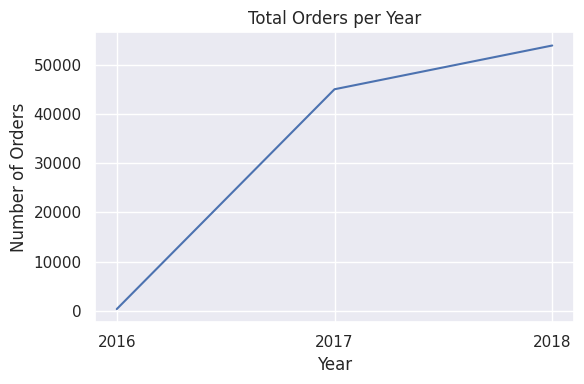

In [35]:
plt.figure(figsize=(6, 4))
plt.plot(orders_per_year['order_year'], orders_per_year['total_orders'])
plt.title('Total Orders per Year')
plt.xlabel('Year')
plt.ylabel('Number of Orders')
plt.xticks(orders_per_year['order_year'])
plt.tight_layout()
plt.show()

The diagram clearly show a significant increase in the number of orders each year:


*   2016: The platform had a relatively low number od orders (329 orders).
*   2017: There was a massive surge in orders, reaching 45101.
*   2018: The growth continued, with total orders further increasing to 54011.

This trend indicates rapid groth in customer engagement and transaction on the platform over these three years.

In [36]:
orders_per_month = (
    df.groupby('order_month')['order_id']
    .nunique()
    .reset_index(name='total_orders')
)

orders_per_month

,order_month,total_orders
0,1,8069
1,2,8508
2,3,9893
3,4,9343
4,5,10573
5,6,9412
6,7,10318
7,8,10843
8,9,4305
9,10,4959


Text(0, 0.5, 'Number of Orders')

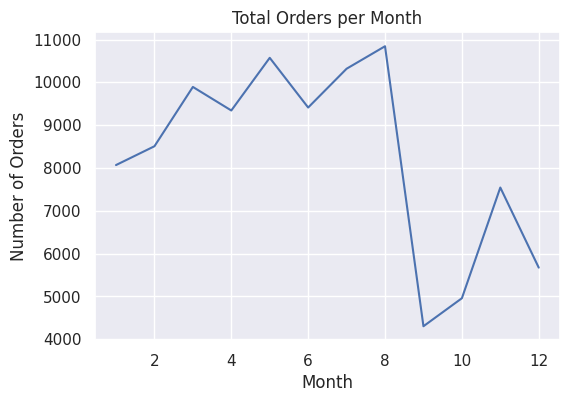

In [37]:
plt.figure(figsize=(6, 4))
plt.plot(orders_per_month['order_month'], orders_per_month['total_orders'])
plt.title('Total Orders per Month')
plt.xlabel('Month')
plt.ylabel('Number of Orders')

The diagram clearly reveals distinct patterns throughout the year:

*   Peaks: There are noticeable peaks in order volume around May, July, and August.
*   Dips: Orders significantly dip in September and December.
*   Early Year Consistency: The early months of the year (January to April) show relatively consistent and strong order numbers.
*   Seasonal Fluctuations: This pattern suggest seasonal variations in customer purchasing behavior, possibly influenced by holidays, promotional periods, or other market factors.



In [38]:
top_customers = (
    df.groupby('customer_unique_id')['total_payment']
    .sum()
    .reset_index()
    .sort_values(by='total_payment', ascending=False)
    .head(10)
)

top_customers

,customer_unique_id,total_payment
39720,698e1cf81d01a3d389d96145f7fa6df8,905120.00
73664,c402f431464c72e27330a67f7b94d4fb,880960.00
3826,0a0a92112bd4c708ca5fde585afaa872,874501.12
90000,ef8d54b3797ea4db1d63f0ced6a906e9,301860.00
5784,0f5ac8d5c31de21d2f25e24be15bbffb,278643.78
88262,eae0a83d752b1dd32697e0e7b4221656,253325.91
23071,3d47f4368ccc8e1bb4c4a12dbda7111b,223466.00
24121,4007669dec559734d6f53e029e360987,218935.44
59672,9eca552063680b7cd2ed0e8aea002b21,213442.56
18805,31e412b9fb766b6794724ed17a41dfa6,198747.92


Text(0, 0.5, 'Total Payment')

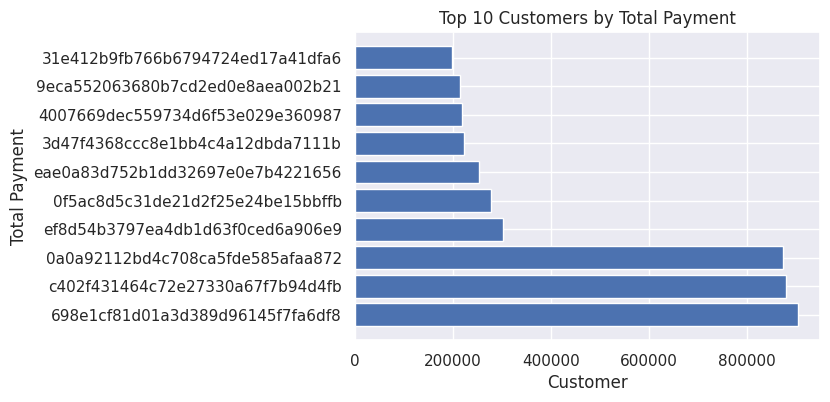

In [39]:
plt.figure(figsize=(6, 4))
plt.barh(top_customers['customer_unique_id'], top_customers['total_payment'])
plt.title('Top 10 Customers by Total Payment')
plt.xlabel('Customer')
plt.ylabel('Total Payment')

The diagram highlights the customers who have contributed the most revenue to the platform. We can see that:

*   A very small number of customers are responsible for a disproportionately large share of the total revenue. This is a classic Pareto principle (80/20 rule) in action, where a few key customers drive significant sales.
*   The highest-spending customer has a total payment of 905,120.00, which is substantially higher than the 10th highest-spending customer.
*   Identifying and understanding the behavior of these top customers is crucial for retention strategies and potentially for targeting similar customer segments.

In [40]:
customer_revenue = (
    df.groupby('customer_unique_id')['total_payment']
    .sum()
    .reset_index()
    .sort_values(by='total_payment', ascending=False)
)

In [41]:
total_revenue = customer_revenue['total_payment'].sum()

top_10_percent = customer_revenue.head(int(0.1 * len(customer_revenue)))
total_revenue_10_percent = top_10_percent['total_payment'].sum()

print(f'Total Revenue: {total_revenue}')
print(f'Total Revenue of Top 10% Customers: {total_revenue_10_percent / total_revenue}')

Total Revenue: 41374130.37
Total Revenue of Top 10% Customers: 0.7113670679430404


Revenue distribution follows a strong Pareto pattern, where the top 10% of customers contribute approximately 71% of total revenue.

This indicates high dependency on high-value customers, suggesting that customer retention and personalized strategies for this segment are critical for sustaining business growth.

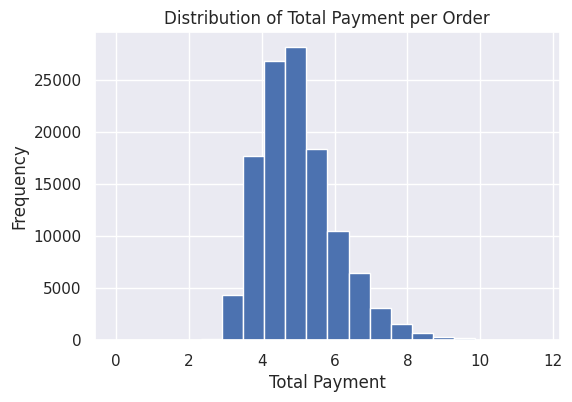

In [42]:
plt.figure(figsize=(6, 4))
plt.hist(np.log1p(df['total_payment']), bins=20)
plt.title('Distribution of Total Payment per Order')
plt.xlabel('Total Payment')
plt.ylabel('Frequency')
plt.show()

In [43]:
df['total_payment'].mean(), df['total_payment'].median()

(np.float64(349.3433504736816), 125.67999999999999)

The distribution of total payment per order shows a right-skewed pattern, indicating that most transactions are of relatively low to medium value, while a smaller number of high-value orders extend the distribution to the right.

This pattern aligns with the Pareto analysis, where a small group of customers contributes disproportinately to total revenue.

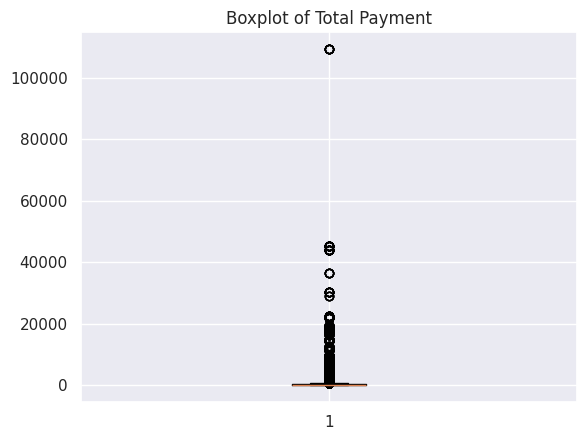

In [44]:
plt.boxplot(df['total_payment'])
plt.title('Boxplot of Total Payment')
plt.show()

In [45]:
df['total_payment'].describe()

,total_payment
count,118434.000000
mean,349.343350
std,1574.079842
min,0.000000
25%,67.500000
50%,125.680000
75%,255.960000
max,109312.640000


The boxplot reveals the presence of multiple high-values outliers, indicating a small number of orders with exceptionally large payment values.

These outliers are likely driven by bulk or repeat purchases from high-value customers and play a significant role in overall revenue contribution.

**Summary of Key Findings**

The analysis shows that transaction values follow a right-skewed distribution, where most orders are low to medium in value, while a small number of high-value orders act as outliers.

Additionally, revenue exhibits a strong Pareto pattern, with the top 10% of customers contributing approximately 71% of total revenue. This indicates a high dependency on a small group of high-value customers.

**Recommendation 1: Focus on High-Value Customer Retention**

The business should prioritze retention strategies for high-value customers, such as loyalty programs, exclusive discounts, or personalized offers. Losing a small number of these customers could result in a significant drop in total revenue.

**Recommendation 2: Customer Segmentation Based on Spending Behavior**

Customers can be segmented into low, medium, and high-value groups based on their total spending. This enables targeted marketing strategies, where high-value customers receive premium treatment, while low-value customers are encouraged to increase purchase frequency through promotions.

**Recommendation 3: Leverage Seasonal Demand Pattern**

The presence of monthly transaction patterns suggests seasonal demand. Marketing campaigns and inventory planning should be aligned with high-demand periods to maximize revenue, while promotions can be introduced during low-demand months to stimulate sales.

**Future Analysis**

Further analysis could include customer lifetime value (CLV), churn analysis for high-value customers, and predictive modeling to identify potential future high-value customers.

**Conclusion**

This analysis highlights the importance of understanding customer behavior beyond aggregate metrics. By identifying revenue concentration, transaction distribution, and high-value customers, the business can make data-driven decisions to improve customer retention, optimize marketing strategies, and sustain long-term growth.